In [1]:
#基准案例
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_path(S0, r,sigma,T,M,I):
    dt = float(T)/M
    paths = np.zeros((M+1,I), np.float64)
    paths[0] = S0
    for t in range(1,M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t-1] * np.exp((r - 0.5*sigma**2) *dt+sigma*np.sqrt(dt) *rand)
    return paths

In [3]:
S0=100.
r=0.05
sigma=0.2
T=1.0
M=50
I=250000
paths=gen_path(S0,r,sigma,T,M,I)

Text(0, 0.5, 'index level')

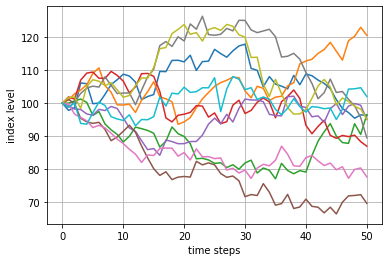

In [4]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [5]:
log_returns =np.log(paths[1:] / paths[0:-1])

In [6]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [7]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [8]:
def print_statistics(array):
    sta = scs.describe(array)
    print("%14s %15s" %('statistic','value'))
    print(30*'-')
    print("%14s %15.5f"%('size',sta[0]))
    print("%14s %15.5f"%('min', sta[1][0]))
    print("%14s %15.5f"%('max', sta[1][1]))
    print("%14s %15.5f"%('mean',sta[2]))
    print("%14s %15.5f"%('std', np.sqrt(sta[3])))
    print("%14s %15.5f"%('skew',sta[4]))
    print("%14s %15.5f"%('kurtosis',sta[5]))

In [9]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


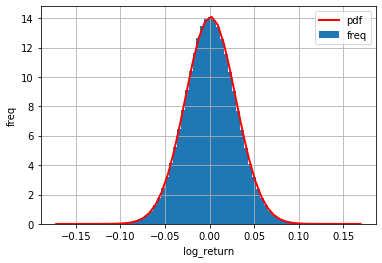

In [10]:
plt.hist(log_returns.flatten(),bins=70,normed=True, label='freq')
plt.grid(True)
plt.xlabel('log_return')
plt.ylabel('freq')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x,loc=r/M, scale=sigma/np.sqrt(M)),'r',lw=2.0,label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

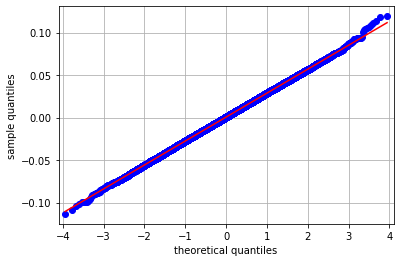

In [11]:
sm.qqplot(log_returns.flatten()[::500],line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [12]:
def normality_tests(arr):
    print("Skew of dataset %14.3f"%scs.skew(arr))
    print("Skew test p-value %14.3f"%scs.skewtest(arr)[1])
    print("Kurt of dataset %14.3f"%scs.kurtosis(arr))
    print("Kurt test p-value %14.3f"%scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f"%scs.normaltest(arr)[1])

In [13]:
normality_tests(log_returns.flatten())

Skew of dataset          0.001
Skew test p-value          0.430
Kurt of dataset          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5, 1.0, 'log data')

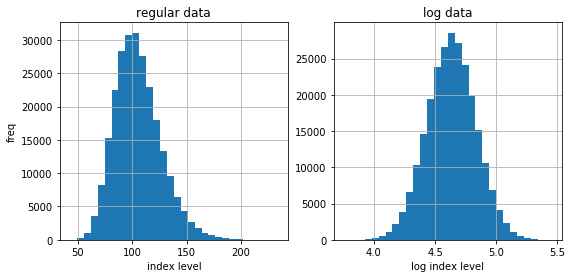

In [14]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('freq')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [15]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [16]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [17]:
normality_tests(np.log(paths[-1]))

Skew of dataset         -0.001
Skew test p-value          0.851
Kurt of dataset         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


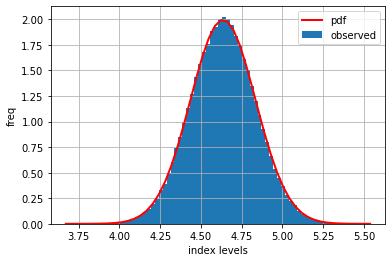

In [18]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('freq')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,log_data.mean(),log_data.std()),
        'r',lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

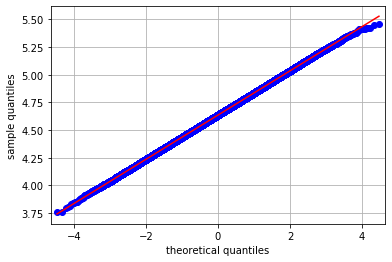

In [19]:
sm.qqplot(log_data,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [20]:
#real-world data
import pandas as pd
import pandas_datareader as web
symbols = ['^GDAXI','^GSPC','YHOO','MSFT']

In [ ]:
data=pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',start='1/1/2016')['Adj Close']
data = data.dropna()
data.info()

In [ ]:
data.head()

In [ ]:
(data/data.iloc[0]*100).plot(figsize=(8,6))

In [ ]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

In [ ]:
log_returns.hist(bins=50,figsize=(9,6))

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s"%sym)
    print(30*'-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)

In [ ]:
sm.qqplot(log_returns['MSFT'].dropna(),line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

投资组合优化

In [19]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
symbols = ['AAPL','MSFT','YHOO','DB','GLD']
noa = len(symbols)

In [ ]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'yahoo',start='1/1/2018', end='1/1/2020')['Adj Close']
    
data.columns = symbols

In [ ]:
(data / data.iloc[0]*100).plot(figsize=(8,5))

In [ ]:
rets = np.log(data/data.shift(1))
rets.mean()*252

In [ ]:
rets.cov()*252

In [ ]:
#基本理论
weights = np.random.random(noa)
weights /=np.sum(weights)
weights

In [ ]:
np.sum(rets.mean()*weights)*252

In [ ]:
np.dot(weights.T, np.dot(rets.cov()*252,weights))

In [ ]:
np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))

In [ ]:
prets=[]
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /=np.sum(weights)
    prets.append(np.sum(rets.mean()*weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(rets.cov() * 252,weights))))
    
prets= np.array(prets)
pvols = np.array(pvols)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
#投资组合优化
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights)*252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [ ]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [ ]:
cons = ({'type':'eq','fun':lambda x:np.sum(x)-1})
bnds = tuple((0,1) for x  in range(noa))
noa*[1./noa,]

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1./noa,], method = 'SLSQP',boungds = bnds,constraints=cons)

In [ ]:
opts

In [ ]:
statistics(opts['x']).round(3)

In [ ]:
def min_func_variance(weights):
    return statistics(weights)[1]**2

optv = sco.minimize(min_func_variance, noa * [1. /noa,], method ='SLSQP'， bounds= bnds, constraints=cons)
optv

In [ ]:
statistics(optv['x']).round(3)

In [ ]:
#Efficient Frontier
cons =({'type':'eq', 'fun':lambda x:statistics(x)[0] - tret},
      {'type':'eq','fun': lambda x:np.sum(x)-1})
bnds = tuple((0,1) for x in weights)

In [ ]:
def min_func_port(weights):
    return statistics(weights)[1]

%%time
trets  = np.linspace(0.0,0.25,50)
tvols = []
for tret in trets:
    cons = ({'type':'eq','fun':lambda x: statistics(x)[0] - tret},
           {'type':'eq','fun':lambda x:np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa*[1. / noa,],method='SLSQP', bounds = bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets,
          c=prets / pvols, marker='o')
plt.scatter(tvols, trets, 
           c=trets / tvols, marker='x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
        'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
        'y*', markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
#capital market line
import scipy.interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]
tck  = sci.splrep(evols, erets)

def f(x):
    return sci.splev(x, tck,der=0)
def df(x):
    return sci.splev(x,tck,der=1)

def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01,0.5,0.15])
opt

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets,
           c=(prets - 0.01)/pvols, marker='o')
plt.plot(evols, erets,'g', lw=4.0)
cx = np.linspace(0.0,0.3)
plt.plot(cx, opt[0] + opt[1]*cx, lw=1.5)
plt.plot(opt[2],f(opt[2]),'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0.color='k', ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
cons = ({'type':'eq','fun':lambda x:statistics(x)[0] - f(opt[2])},
        {'type':'eq','fun':lambda x:np.sum(x) -1})
res = sco.minimize(min_func_port, noa * [1./noa,],method = 'SLSQP',bounds=bnds, constraints=cons)
res['x'].round(3)

主成分分析

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.decomposition import KernelPCA
symbols = ['ADS.DE','ALV.DE','BAS.DE','BAYN.DE','BEI.DE',
          'BMW.DE','CBK.DE','CON.DE','DAI.DE','DB1.DE',
          'DBK.DE','DPW.DE','DTE.DE','EOAN.DE','FME.DE',
          'FRE.DE','HEI.DE','HEN3.DE','IFX.DE','LHA.DE',
          'LIN.DE','LXS.DE','MRK.DE','MUV2.DE','RWE.DE',
          'SAP.DE','SDF.DE','SIE.DE','TKA.DE','VOW3.DE',
          '^DGAXI']

In [ ]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data = data.dropna()

In [ ]:
dax = pd.DataFrame(data.pop('^GDAXI'))
data[data.columns[:6]].head()

In [ ]:
#应用PCA
scale_function = lambda x:(x - x.maen())/x.std()
pca = kernelPCA().fit(data.appl(scale_function))
len(pca.lambdas_)

In [ ]:
get_we = lambda x:x/x.sum()
get_we(pca.lambdas_)[:10]

In [ ]:
#构造PCA
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

In [ ]:
import matplot.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))

In [ ]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

In [ ]:
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))


In [ ]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],dax['^GDAXI'],1), dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r',lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))

In [ ]:
cut_date = '2019/7/1'
early_pca = dax[dax.index<cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index<cut_date],1),early_pca)
late_pca = dax[dax.index >=cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,dax['^GDAXI'][dax.index >=cut_date],1),late_pca)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r',lw=3)
plt.plot(late_pca, late_reg, 'r',lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval=250),
            format=mpl.dates.DateFormatter('%d %b %y'))